In [1]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

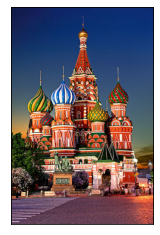

In [2]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [3]:
img_data = (img/255.0).reshape(-1, 3)

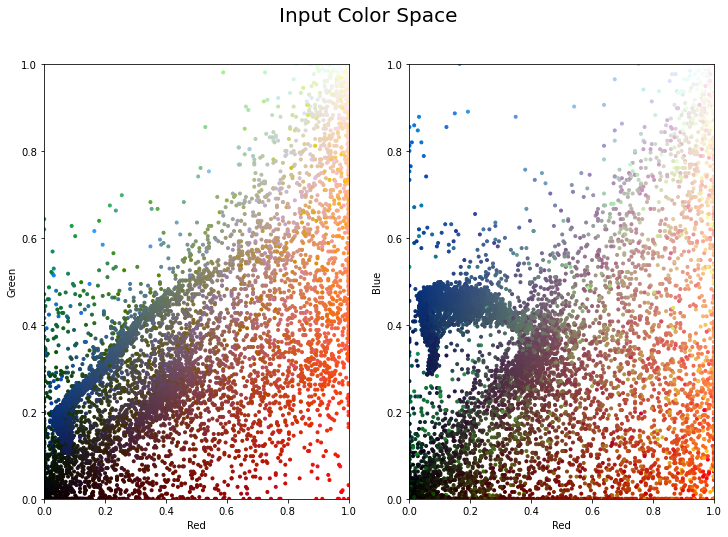

In [4]:
from plot_utils import plot_utils
x = plot_utils(img_data, title='Input Color Space')
x.colorSpace()

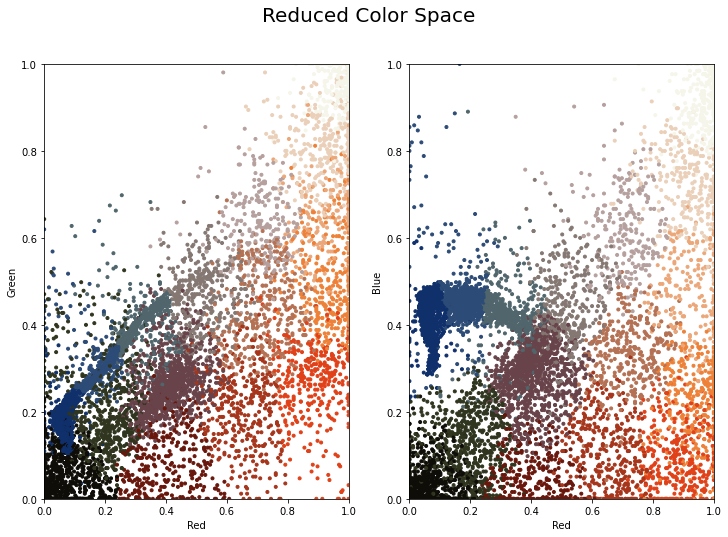

In [5]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

y = plot_utils(img_data, colors=k_colors, title='Reduced Color Space')
y.colorSpace()

In [6]:
img_dir = 'images/'

In [10]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 12)

image_dir_list = os.listdir(img_dir)
slider = IntSlider(min=1, max=256, step=1, value=16, continuous_update=False, layout={'width':'100%'})

@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1, max=256, step=1, value=16, continuous_update=False, layout={'width':'100%'})):
    input_img = io.imread(img_dir+image)
    img_data = (input_img/255.0).reshape(-1, 3)    
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-Means Image Compression', fontSize=20)
    
    ax1.set_title(f'Compressed Image: {k} colors', fontSize=8)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original Image: (16, 777, 216) colors', fontSize=8)
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…